In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')

### Load the data 

In [2]:
path = '../Machine Learning/20180406_LEVS_195_90_R_E_ml_pca.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.columns

Index(['Unnamed: 0', 'pwr', 'spd', 'porc', 'viento_aparente', 'x_tsne',
       'y_tsne', 'z_tsne'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,pwr,spd,porc,viento_aparente,x_tsne,y_tsne,z_tsne
0,0,0.0,5.000000,0.000000,0.000000,-1.687773,6.267898,3.898278
1,1,0.0,5.141748,-11.731324,9.363222,3.334101,-3.127026,5.262300
2,2,0.0,5.200000,1.398533,9.817220,-1.728607,6.219493,3.933778
3,3,0.0,5.238999,-11.945909,9.986843,3.341562,-3.145879,5.253956
4,4,0.0,5.300000,-3.689984,9.813719,-0.324282,-1.608544,4.862890


In [7]:
#Por aqui

In [6]:
simple = df[['pwr','spd','porc','viento_aparente']]

In [7]:
simple_pca = df[['x_tsne','y_tsne','z_tsne']]

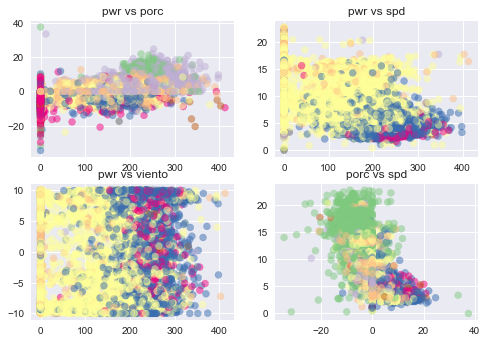

In [17]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['spd'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['porc'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['porc'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['pwr'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

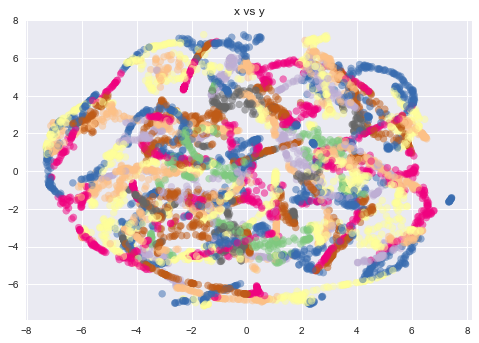

In [21]:

plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['z_tsne'],cmap='Accent')
plt.title('x vs y')
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=5)

In [25]:
kmeans.fit(simple)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
clust = kmeans.predict(simple)

In [27]:
simple['k-means']=clust

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
simple.columns

Index(['pwr', 'spd', 'porc', 'viento_aparente', 'k-means'], dtype='object')

In [29]:
simple.head(10)

,pwr,spd,porc,viento_aparente,k-means
0,0.0,5.000000,0.000000,0.000000,2
1,0.0,5.141748,-11.731324,9.363222,2
2,0.0,5.200000,1.398533,9.817220,2
3,0.0,5.238999,-11.945909,9.986843,2
4,0.0,5.300000,-3.689984,9.813719,2
5,0.0,5.352179,-0.867023,8.174353,2
6,0.0,6.059540,-4.974327,8.339579,2
7,0.0,6.338999,0.000000,9.284703,2
8,0.0,6.400000,0.000000,9.899500,2
9,0.0,6.400000,-4.225640,9.999783,2


In [30]:
simple.groupby('k-means').count()

,pwr,spd,porc,viento_aparente
k-means,,,,
0,1327,1327,1327,1327
1,923,923,923,923
2,1715,1715,1715,1715
3,1417,1417,1417,1417
4,2204,2204,2204,2204


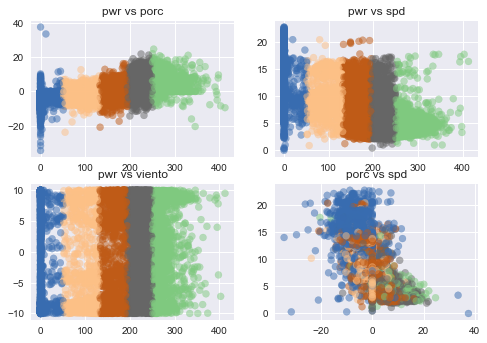

In [31]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

In [32]:
from sklearn import mixture

In [33]:
model2 = mixture.GaussianMixture(n_components=5)

In [35]:
model2.fit(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [36]:
model2.predict(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

array([1, 1, 1, ..., 4, 4, 3], dtype=int64)

In [37]:
simple['gaussian'] = model2.predict(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
simple.columns

Index(['pwr', 'spd', 'porc', 'viento_aparente', 'k-means', 'gaussian'], dtype='object')

In [39]:
simple.head(10)

,pwr,spd,porc,viento_aparente,k-means,gaussian
0,0.0,5.000000,0.000000,0.000000,2,1
1,0.0,5.141748,-11.731324,9.363222,2,1
2,0.0,5.200000,1.398533,9.817220,2,1
3,0.0,5.238999,-11.945909,9.986843,2,1
4,0.0,5.300000,-3.689984,9.813719,2,1
5,0.0,5.352179,-0.867023,8.174353,2,1
6,0.0,6.059540,-4.974327,8.339579,2,1
7,0.0,6.338999,0.000000,9.284703,2,1
8,0.0,6.400000,0.000000,9.899500,2,1
9,0.0,6.400000,-4.225640,9.999783,2,1


In [40]:
simple.groupby('gaussian').count()

,pwr,spd,porc,viento_aparente,k-means
gaussian,,,,,
0,1778,1778,1778,1778,1778
1,1456,1456,1456,1456,1456
2,1232,1232,1232,1232,1232
3,2220,2220,2220,2220,2220
4,900,900,900,900,900


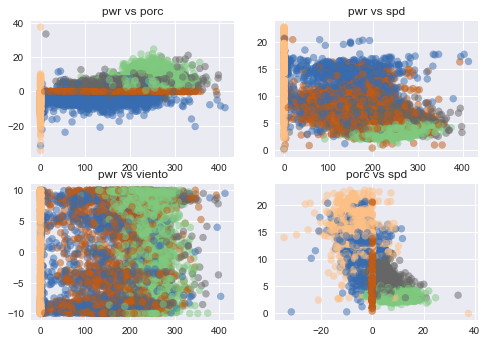

In [41]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

In [ ]:
#LO MISMO CON LAS VARIABLESQ QUE SALIERON DEL PCA

In [42]:
kmeans_pca = KMeans(n_clusters=5)

In [43]:
kmeans_pca.fit(simple_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
clust_pca = kmeans_pca.predict(simple_pca)

In [45]:
simple_pca['k-means']=clust_pca

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
simple_pca.columns

Index(['x_tsne', 'y_tsne', 'z_tsne', 'k-means'], dtype='object')

In [47]:
simple_pca.head(10)

,x_tsne,y_tsne,z_tsne,k-means
0,-1.687773,6.267898,3.898278,4
1,3.334101,-3.127026,5.262300,2
2,-1.728607,6.219493,3.933778,4
3,3.341562,-3.145879,5.253956,2
4,-0.324282,-1.608544,4.862890,2
5,-1.738453,6.172400,3.862551,4
6,-0.389241,-1.526303,4.860177,2
7,-1.911752,5.726861,3.478523,4
8,-1.922578,5.693539,3.446318,4
9,-0.426759,-1.605777,4.828764,2


In [48]:
simple_pca.groupby('k-means').count()

,x_tsne,y_tsne,z_tsne
k-means,,,
0,1529,1529,1529
1,1328,1328,1328
2,1694,1694,1694
3,1383,1383,1383
4,1652,1652,1652


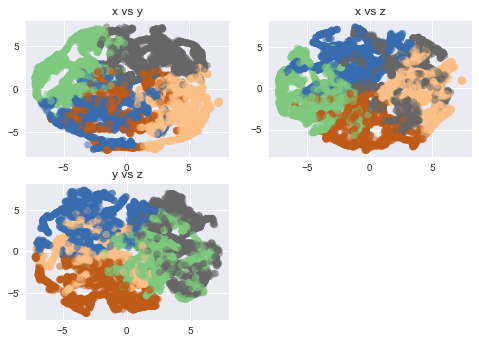

In [49]:
plt.subplot(221)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('x vs y')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('x vs z')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple_pca['y_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('y vs z')
plt.grid(True)

In [50]:
model2_pca = mixture.GaussianMixture(n_components=5)

In [52]:
model2_pca.fit(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [53]:
model2_pca.predict(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

array([1, 2, 1, ..., 2, 4, 1], dtype=int64)

In [54]:
simple_pca['gaussian'] = model2_pca.predict(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
simple_pca.columns

Index(['x_tsne', 'y_tsne', 'z_tsne', 'k-means', 'gaussian'], dtype='object')

In [57]:
simple_pca.head(10)

,x_tsne,y_tsne,z_tsne,k-means,gaussian
0,-1.687773,6.267898,3.898278,4,1
1,3.334101,-3.127026,5.262300,2,2
2,-1.728607,6.219493,3.933778,4,1
3,3.341562,-3.145879,5.253956,2,2
4,-0.324282,-1.608544,4.862890,2,3
5,-1.738453,6.172400,3.862551,4,1
6,-0.389241,-1.526303,4.860177,2,3
7,-1.911752,5.726861,3.478523,4,1
8,-1.922578,5.693539,3.446318,4,1
9,-0.426759,-1.605777,4.828764,2,3


In [58]:
simple_pca.groupby('gaussian').count()

,x_tsne,y_tsne,z_tsne,k-means
gaussian,,,,
0,1754,1754,1754,1754
1,1633,1633,1633,1633
2,1328,1328,1328,1328
3,1759,1759,1759,1759
4,1112,1112,1112,1112


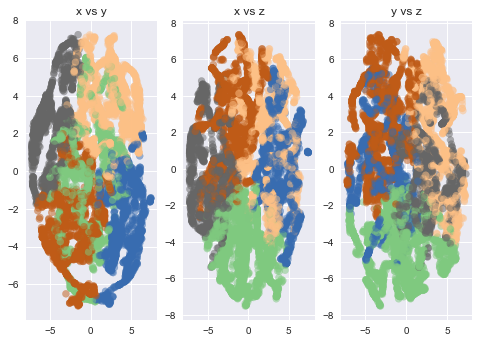

In [65]:
plt.subplot(131)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('x vs y')
plt.grid(True)

plt.subplot(132)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('x vs z')
plt.grid(True)

plt.subplot(133)
plt.scatter(x=simple_pca['y_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('y vs z')
plt.grid(True)

In [61]:
simple.to_csv('20180406_LEVS_195_90_R_E_ml_pca_clust.csv')